**HeartAttack analysis and Prediction** 

**Importing libraries**

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
pip install tensorflow

  Using cached tensorflow-2.5.0-cp38-cp38-win_amd64.whl (422.6 MB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.34.1-cp38-cp38-win_amd64.whl (2.9 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached google_auth_oauthlib-0.4.4-py2.py3-none-any.whl (18 kB)

  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Attemptin

**Loading and reading the data in a dataframe**

In [5]:
data = pd.read_csv('heart.csv')

In [6]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


**Checking for null values**

In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**We can see that there are no null values in the dataset**

In [9]:
cont_var=["age","trtbps","chol","thalachh","oldpeak"]
cate_var=['sex','exng','caa','cp','fbs','restecg','slp','thall']
print("continoius colums are: ",cont_var)
print("categorical colums are: ",cate_var)

continoius colums are:  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
categorical colums are:  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']


**Checking for correlations**

In [10]:
corrMat = data[cont_var].corr().transpose()
corrMat

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


**Visualising the correlation matrix**

<AxesSubplot:>

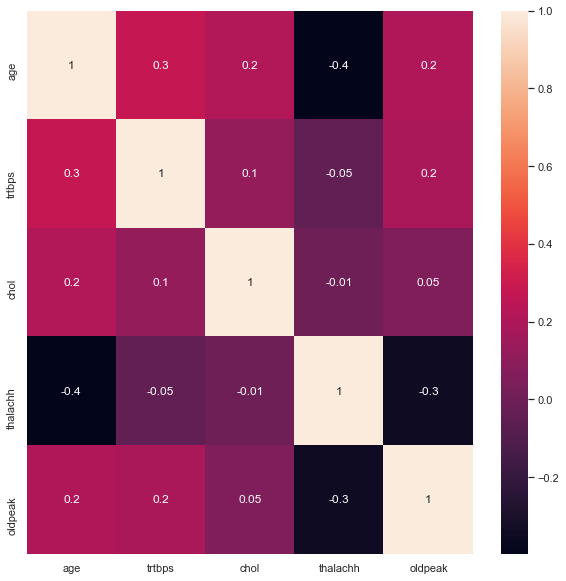

In [11]:
fig= plt.subplots(figsize=(10,10))
sns.heatmap(data[cont_var].corr(), annot = True, fmt='.1g')

**Performing variable analysis**

<AxesSubplot:xlabel='age', ylabel='Density'>

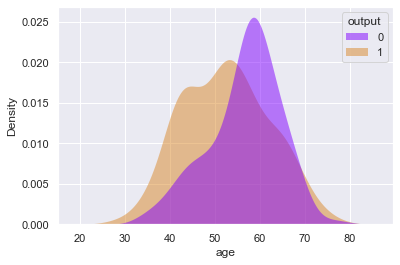

In [12]:
sns.kdeplot(data=data, x='age',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)

<AxesSubplot:xlabel='cp', ylabel='Density'>

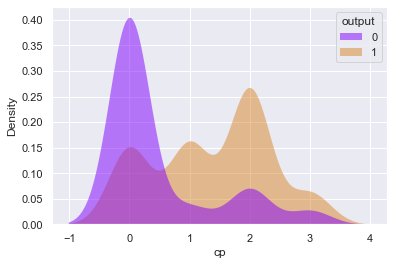

In [13]:
sns.kdeplot(data=data, x='cp',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)

<AxesSubplot:xlabel='trtbps', ylabel='Density'>

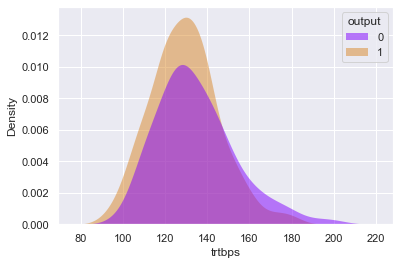

In [14]:
sns.kdeplot(data=data, x='trtbps',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)

<AxesSubplot:xlabel='age', ylabel='Density'>

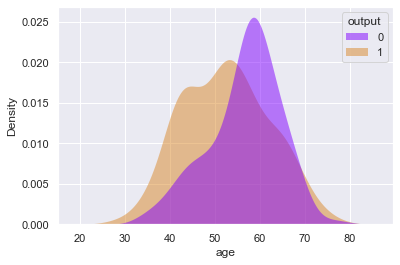

In [15]:
sns.kdeplot(data=data, x='age',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)

<AxesSubplot:xlabel='thalachh', ylabel='Density'>

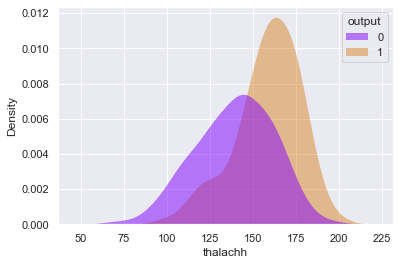

In [16]:
sns.kdeplot(data=data, x='thalachh',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)

<AxesSubplot:xlabel='caa', ylabel='Density'>

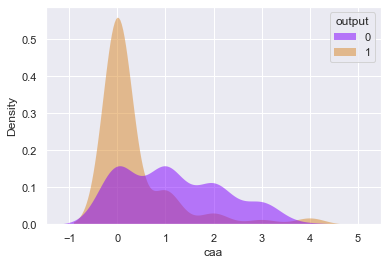

In [17]:
sns.kdeplot(data=data, x='caa',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)

<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

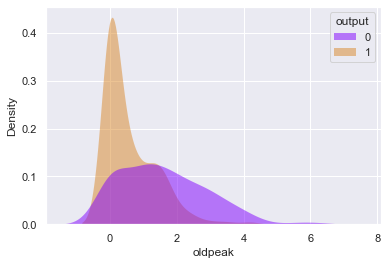

In [18]:
 sns.kdeplot(data=data, x='oldpeak',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)

<AxesSubplot:xlabel='chol', ylabel='Density'>

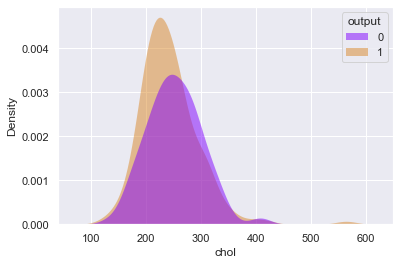

In [19]:
 sns.kdeplot(data=data, x='chol',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)

**INSIGHTS:**

- No significance correlation between the variables.

- Age doesn't seem to be directly causing heart attacks

- People with chest pain type 2 seems to be at greater risk

- People with old peak 0 seems to be at greater risk

- People with caa 0 seems to be at greater risk

**PREPROCESSING**

In [20]:
unscaled_inputs = data.drop(['output'],axis=1)
targets =data['output']
data_with_dummies = pd.get_dummies(unscaled_inputs, drop_first = True)
from sklearn import preprocessing 
scaledInputs=preprocessing.scale(data_with_dummies)
samples_count=data_with_dummies.shape[0]
data_with_dummies

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


**Train-Test-Validation split**

In [21]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaledInputs,targets, test_size = 0.2, random_state = 365)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 13)
The shape of X_test is        (61, 13)
The shape of y_train is       (242,)
The shape of y_test is        (61,)


**Performing Logistic Rergession**

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logistic_model=LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_acc = logistic_model. score (X_test, y_test)
print ("accuracy = ",logistic_acc)

accuracy =  0.8360655737704918


**SVM**

In [23]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', random_state=42).fit(X_train,y_train)
y_pred = clf.predict(X_test)
svm_acc=accuracy_score(y_test, y_pred)

**KNN**

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Accuracy Score of Test Data is {knn_acc}\n")

Accuracy Score of Training Data is 0.8636363636363636
Accuracy Score of Test Data is 0.7868852459016393



**Naive-Bayes**

In [25]:
from sklearn.naive_bayes import GaussianNB
nbc=GaussianNB()
nbc.fit(X_train, y_train)
nbc_acc = accuracy_score(y_test, nbc.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, nbc.predict(X_train))}")
print(f"Accuracy Score of Test Data is {nbc_acc}\n")

Accuracy Score of Training Data is 0.8471074380165289
Accuracy Score of Test Data is 0.7868852459016393



**Random Forest**

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Accuracy Score of Test Data is {rf_acc}\n")

Accuracy Score of Training Data is 1.0
Accuracy Score of Test Data is 0.8032786885245902



**Comparing the prediction results by visualization**

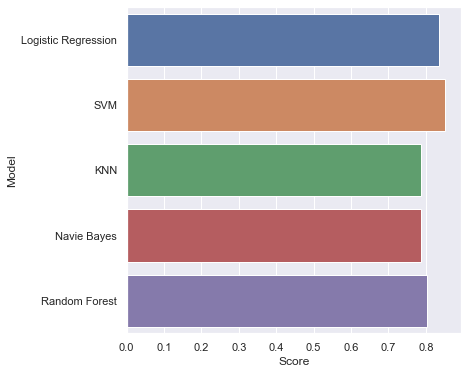

In [27]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression','SVM', 'KNN','Navie Bayes','Random Forest'],
    'Score' : [logistic_acc,svm_acc,knn_acc,nbc_acc,rf_acc]
})
models.sort_values(by = 'Score', ascending = False)
plt.figure(figsize = (6, 6))
sns.barplot(x = 'Score', y = 'Model', data = models)

plt.show()

Looks like SVM takes the prize here !!